# Finding the positions of the wheels & Stop Signs

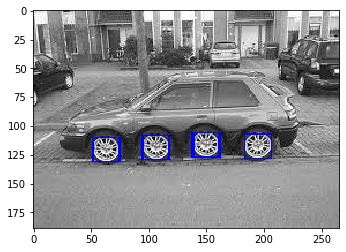

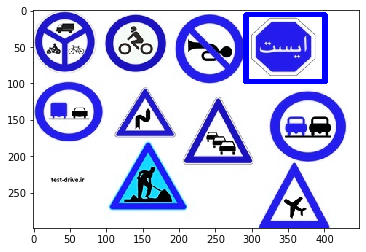

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#reading images

#car and wheel
image1 = cv2.imread('car.jpg')
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread('wheel.jpg', 0)
#traffic signs and stop sign
image2 = cv2.imread('Traffic Signs.jpg')
image_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
template2 = cv2.imread('Stop.jpg', 0)

#width and height of templates

#car and wheel
w1, h1 = template1.shape[::-1]
#traffic signs and stop sign
w2, h2 = template2.shape[::-1]

res1 = cv2.matchTemplate(image_gray1, template1, cv2.TM_CCOEFF_NORMED) #finding the location of wheels
res2 = cv2.matchTemplate(image_gray2, template2, cv2.TM_CCOEFF_NORMED) #finding the location of stop signs

threshold1 = 0.4 #a threshold for finding wheels in the car picture
threshold2 = 0.8 #a threshold for finding stop signs in the traffic signs picture

loc1 = np.where(res1 >= threshold1) #seperating the wheels from other parts of picture
loc2 = np.where(res2 >= threshold2) #seperating the stop sign from the other signs

#drawing rectangle over the templates

#car and wheel
for pt in zip(*loc1[::-1]):
    cv2.rectangle(image1, pt, (pt[0] + w1, pt[1] + h1), (0,0,255), 1)
#traffic signs and stop sign
for pt in zip(*loc2[::-1]):
    cv2.rectangle(image2, pt, (pt[0] + w2, pt[1] + h2), (0,0,255), 1)

#showing photos
plt.figure()
plt.imshow(image1)
plt.savefig('Template1.jpg')
plt.figure()
plt.imshow(image2)
plt.savefig('Template2.jpg')
plt.show()